In [1]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# os.chdir('D:\Practical Time Series')

In [2]:
data = pd.read_csv('Data\WDIData.csv')

In [3]:
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')


In [4]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (422136, 64)


In [5]:
nb_indicators = data['Indicator Name'].unique().shape[0]
print('Unique number of indicators:', nb_indicators)

Unique number of indicators: 1599


In [6]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


In [7]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

In [8]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 64)
Shape of military_exp: (264, 64)


In [9]:
central_govt_debt['2010'].describe()

count     60.000000
mean      51.484739
std       31.131256
min        6.385576
25%       27.632094
50%       48.442052
75%       65.764737
max      162.296407
Name: 2010, dtype: float64

In [10]:
military_exp['2010'].describe()

count    193.000000
mean       1.954996
std        1.305419
min        0.000000
25%        1.169691
50%        1.563666
75%        2.594058
max        8.565677
Name: 2010, dtype: float64

In [11]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

In [12]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]

In [13]:
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)

C:\Users\kxi110617\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
data_to_plot.columns = ['central_govt_debt', 'military_exp']

In [15]:
data_to_plot.head(10)

,central_govt_debt,military_exp
AFG,NaN,1.945837
AGO,NaN,4.177585
ALB,NaN,1.558592
ARB,NaN,5.040500
ARE,NaN,6.038592
ARG,NaN,0.814878
ARM,NaN,4.265646
AUS,29.257361,1.862400
AUT,NaN,0.821233
AZE,6.385576,2.791004


In [16]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [17]:
data_to_plot.head()

,central_govt_debt,military_exp
AUS,29.257361,1.862400
AZE,6.385576,2.791004
BLR,18.440358,1.341383
BLZ,80.189810,1.097792
BRA,61.318780,1.539407


C:\Users\kxi110617\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Military expenditure (% of GDP) of 85 countries in 2010')

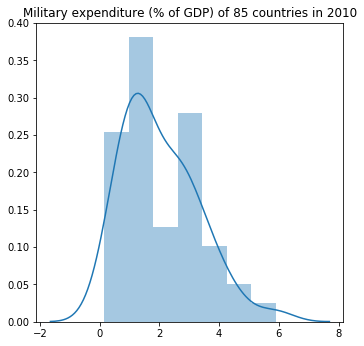

In [19]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010')
# plt.savefig('plots/ch1/B07887_01_01.png', format='png', dpi=300)

Text(0.5,1,'Military expenditures & Debt of central governments in 2010')

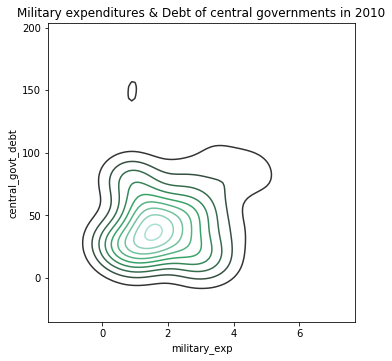

In [20]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt)
g.set_title('Military expenditures & Debt of central governments in 2010')
# plt.savefig('plots/ch1/B07887_01_02.png', format='png', dpi=300)

In [21]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

In [22]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)

In [23]:
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]

In [24]:
data_us = data_us.iloc[index0:index1+1,:]

In [25]:
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']

In [26]:
data_us.head(20)

,Federal Military Expenditure,Debt of Federal Government
1960,8.61959,NaN
1961,8.77573,NaN
1962,8.94408,NaN
1963,8.46506,NaN
1964,7.71687,NaN
1965,7.20695,NaN
1966,8.07084,NaN
1967,9.06337,NaN
1968,8.87311,NaN
1969,8.27294,NaN


In [27]:
#There are null rows for several years possibly due to unavailability of data for these years
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (22, 2)


In [29]:
#First 20 rows of data_us after dropping rows with missing values
data_us.head()

,Federal Military Expenditure,Debt of Federal Government
1989,5.54685,39.1284
1990,5.27832,40.9339
1991,4.57218,44.0616
1992,4.66626,46.0501
1993,4.32694,48.2461


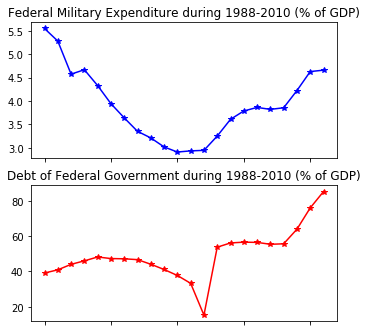

In [30]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])
# plt.savefig('plots/ch1/B07887_01_03.png', format='png', dpi=300)

In [31]:
chn = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='CHN'),index0:index1+1
             ]
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)

usa = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='USA'),index0:index1+1
             ]
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)

ind = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='IND'),index0:index1+1
             ]
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)

gbr = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
               (data['Country Code']=='GBR'),index0:index1+1
             ]
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)

C:\Users\kxi110617\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\kxi110617\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\kxi110617\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-d

Text(0.5,0,'Years')

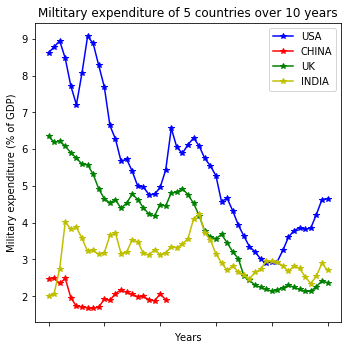

In [33]:
plt.figure(figsize=(5.5, 5.5))
usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r')
gbr.plot(linestyle='-', marker='*', color='g')
ind.plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA','RUSSIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')
# plt.savefig('plots/ch1/B07887_01_04.png', format='png', dpi=300)